In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import shap  # For explainability

In [ ]:
df = pd.read_csv("/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Replace zeroes with NaN in specific columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute missing values with median
df.fillna(df.median(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
models = {'Logistic Regression': log_model, 'Random Forest': rf_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
Confusion Matrix:
 [[82 17]
 [21 34]]

Random Forest Performance:
Accuracy: 0.7597402597402597
Precision: 0.65
Recall: 0.7090909090909091
Confusion Matrix:
 [[78 21]
 [16 39]]


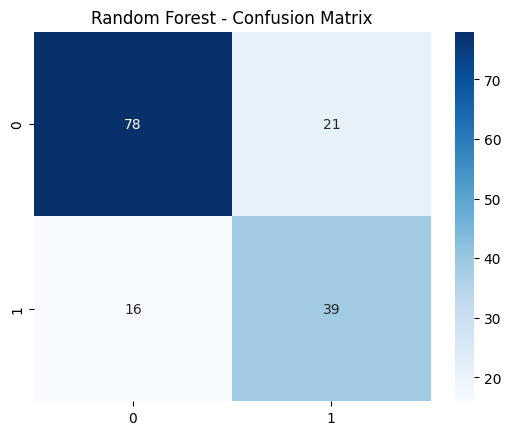

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

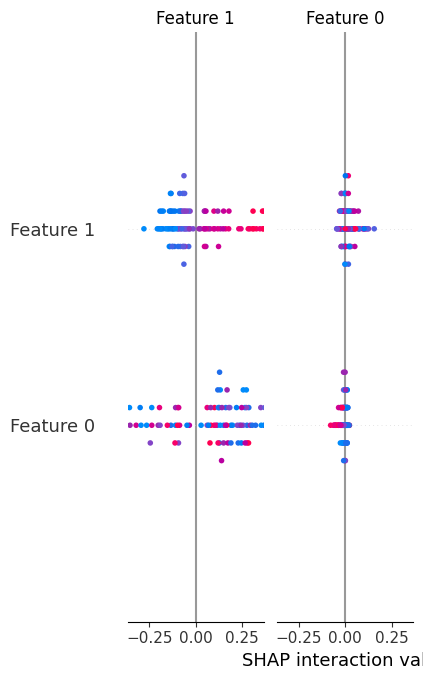

In [ ]:
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test[:100], check_additivity=False)

shap.summary_plot(shap_values, X_test[:100])

In [ ]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']